<a href="https://colab.research.google.com/github/jaanu2003/jahnavi.github.io/blob/main/Hand_written_digit_classification_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

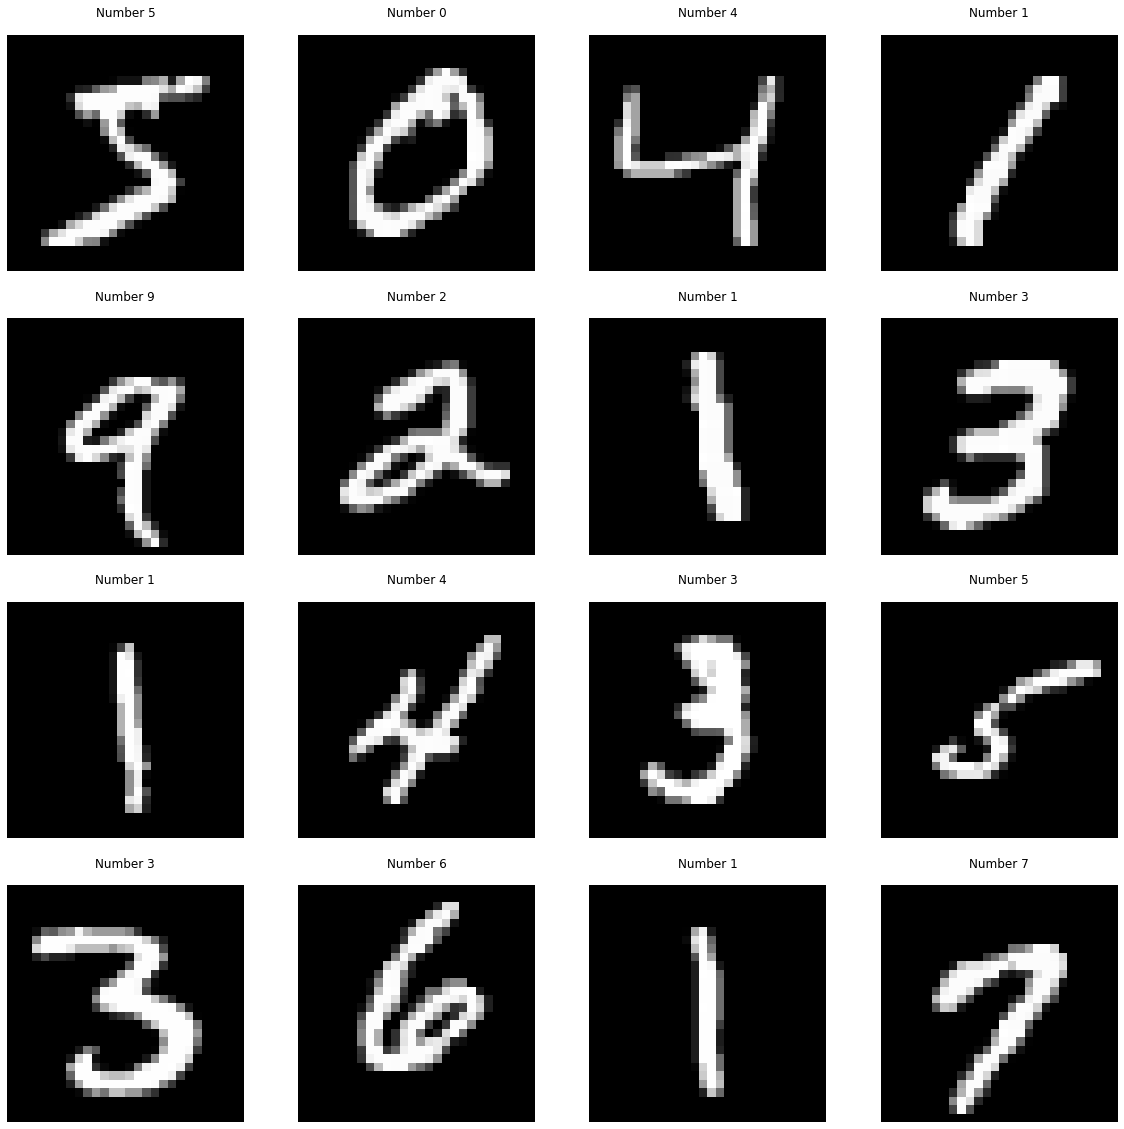

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, 4, figsize = (20, 20))
plt.gray()
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
fig.show()


Number is: 5


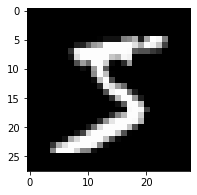

Number is: 0


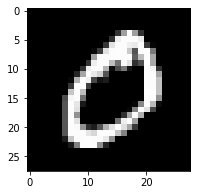

Number is: 4


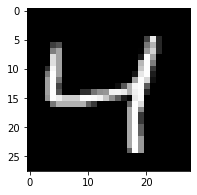

Number is: 1


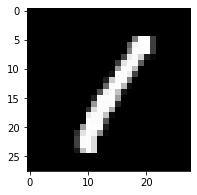

Number is: 9


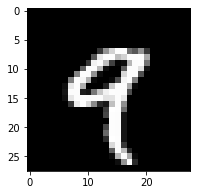

Number is: 2


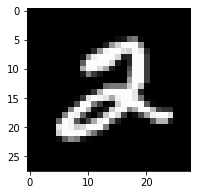

Number is: 1


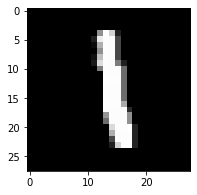

Number is: 3


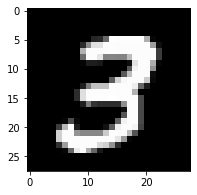

Number is: 1


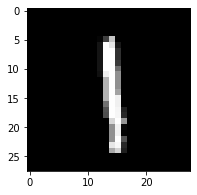

Number is: 4


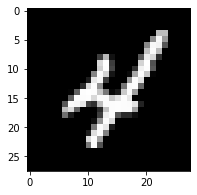

In [ ]:
for i in range(0,10):
    plt.figure(figsize=(3,3))
    plt.imshow(x_train[i])
    print("Number is:",y_train[i])
    plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)
print(x_train.ndim)

4


In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:',x_train.shape)
print('Number of images in x_train',x_train.shape[0])
print('Number of images in x_test',x_test.shape[0])


x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:
print(x_train[0])

[[[0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]]

 [[0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.000

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , Dropout , Flatten , MaxPooling2D

model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128 , activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=3)




Epoch 1/3
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2073 - accuracy: 0.9381
Epoch 2/3
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0823 - accuracy: 0.9743
Epoch 3/3
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0568 - accuracy: 0.9821


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0571 - accuracy: 0.9832


[0.0571172796189785, 0.9832000136375427]

In [ ]:
p=model.predict(x_test)
print(p[0])

[2.2804509e-09 4.9752087e-09 8.3642348e-08 2.5311658e-06 2.3527805e-10
 2.7604447e-10 3.1118697e-12 9.9999690e-01 5.1402815e-09 4.4478003e-07]
